### Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img = cv2.imread('images/face.jpg',cv2.IMREAD_GRAYSCALE)
                            #.IMREAD_COLOR, UNCHANGED
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


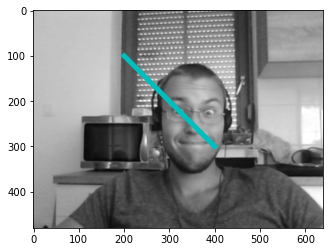

In [4]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

### Video capture

In [5]:
cap = cv2.VideoCapture(0)

#saving the video
fourcc = cv2.VideoWriter_fourcc(*'XVID') #kodex for saving
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(True):
    ret, frame = cap.read()
    #color -> gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('frame', gray)
    #exit on 'q' press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

### Drawing

In [6]:
img = cv2.imread('images/face.jpg',cv2.IMREAD_COLOR)

cv2.line(img,(0,0),(150,150),(255,255,255),15)
#       where, start, stop, color, width
cv2.rectangle(img,(15,25),(200,150),(0,0,255),10)
# circle

pts = np.array([[100,50],[200,300],[700,200],[500,100]], np.int32)
pts = pts.reshape((-1,1,2)) #shape of array
cv2.polylines(img, [pts], True, (0,255,255), 3)

# tekst
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(10,500), font, 6, (200,255,155), 13, cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Basic image operations

In [7]:
img = cv2.imread('images/face.jpg',cv2.IMREAD_COLOR)

Reference a pixel and change the colour:

In [8]:
px = img[55,55]

#change the value of BGR
img[55,55] = [255,255,255]
px = img[55,55]
print(px) #prints the color of a pixel

[255 255 255]


In [9]:
# region of image
roi = img[100:1050,100:1000]
img[100:1005,100:1000] = [255,255,255]

In [10]:
# copy and paste a region
watch_face = img[37:111,107:194]
img[0:74,0:87] = watch_face

In [11]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
print(img.shape)
print(img.size)
print(img.dtype)

(480, 640, 3)
921600
uint8


### Image arithemtics and logic

In [13]:
# 500 x 250 enaki!
img1 = cv2.imread('images/3D-Matplotlib.png')
img2 = cv2.imread('images/mainsvmimage.png')

#add = img1 + img2
add = cv2.add(img1,img2) #adds pixel values

cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
                          #(first, value, second, value, gama)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# Add image without background
img1 = cv2.imread('images/3D-Matplotlib.png')
img2 = cv2.imread('images/mainlogo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
# crnobel logo
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# TRESHOLD: samo 255 in 0, inverzno
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)

#samo 255 in 0
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Add img1 backround and img2 foreground
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Thresholding

In [16]:
#load image, convert to grayscale
img = cv2.imread('images/bookpage.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#color threshold
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
#grayscale threshold
retval, threshold2 = cv2.threshold(gray, 12, 255, cv2.THRESH_BINARY)
#adaptive threshold
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 115, 1)
#Otsu threshold
retval2, otsu = cv2.threshold(gray,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('original', img)
cv2.imshow('threshold', threshold)
cv2.imshow('threshold2', threshold2)
cv2.imshow('adaptive', adaptive)
cv2.imshow('otsu', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Color filtering

In [17]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # hue, saturation, value
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([180,255,255]) #to 180!
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask= mask)
    #where mask=1(white) show frame

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

### Blurring
Get rid of the noise

In [18]:
#...
    kernel = np.ones((15,15),np.float32)/225
    
    #different types of blurring:
    smoothed = cv2.filter2D(res,-1,kernel)
    Gaussian = cv2.GaussianBlur(res,(15,15),0)
    median = cv2.medianBlur(res,15)
    bilateral = cv2.bilateralFilter(res,15,75,75)

    cv2.imshow('Median Blur',median)
    cv2.imshow('Original',frame)  
#...

IndentationError: unexpected indent (<ipython-input-18-d547abc42ed9>, line 2)

### Morphological transformations
Erosion is where we will "erode" the edges. The way these work is we work with a slider (kernel). We give the slider a size, let's say 5 x 5 pixels. What happens is we slide this slider around, and if all of the pixels are white, then we get white, otherwise black. This may help eliminate some white noise. The other version of this is Dilation, which basically does the opposite: Slides around, if the entire area isn't black, then it is converted to white.

The next pair is "opening" and "closing." The goal with opening is to remove "false positives" so to speak. Sometimes, in the background, you get some pixels here and there of "noise." The idea of "closing" is to remove false negatives. Basically this is where you have your detected shape, like our hat, and yet you still have some black pixels within the object. Closing will attempt to clear that up.

In [19]:
#...
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
#...

IndentationError: unexpected indent (<ipython-input-19-89fffa407be9>, line 2)

### Gradients and edge detection
Image gradients can be used to measure directional intensity.

In [20]:
#...
    laplacian = cv2.Laplacian(frame,cv2.CV_64F) #DEFAULT
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
                                        #kernel size
    
    edges = cv2.Canny(frame,100,200)
#...

IndentationError: unexpected indent (<ipython-input-20-287eed1ceadd>, line 2)

### Template matching
The idea here is to find identical regions of an image that match a template we provide, giving a certain threshold. For exact object matches, with exact lighting/scale/angle, this can work great. An example where these conditions are usually met is just about any GUI on the computer. The buttons and such are always the same, so you can use template matching. Pair template matching with some mouse controls and you've got yourself a web-based bot!

In [2]:
import cv2
import numpy as np

img_rgb = cv2.imread('images/ports.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('images/template.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Foreground extraction

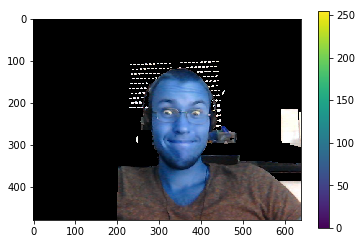

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/face.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (200,100,500,400)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

### Corner detection

In [4]:
import numpy as np
import cv2

img = cv2.imread('images/corners.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.1, 10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
cv2.imshow('Corner',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Feature matching

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('pillow.jpg',0)
img2 = cv2.imread('pile.jpg',0)

#detector
orb = cv2.ORB_create()

#find key points and their descriptors
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

#BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#sorted matches of the descriptors
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

#draw and plot
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

TypeError: Image data can not convert to float

### Foreground reduction (motion detection)

In [10]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()

### Haar cascade object detection
Download the cascade files!
https://github.com/Itseez/opencv/tree/master/data/haarcascades

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

cap.release()
cv2.destroyAllWindows()

error: D:\Build\OpenCV\opencv-3.3.0\modules\imgproc\src\color.cpp:10638: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor
